In [ ]:
!pip install librosa==0.10.1 matplotlib==3.7

In [14]:
from pathlib import Path

from IPython.display import Audio
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
audio_path = Path("../data/ringtone.wav")

samples, sample_rate = librosa.load(audio_path, sr=None) # use the native sampling rate

samples.shape, sample_rate

((262094,), 44100)

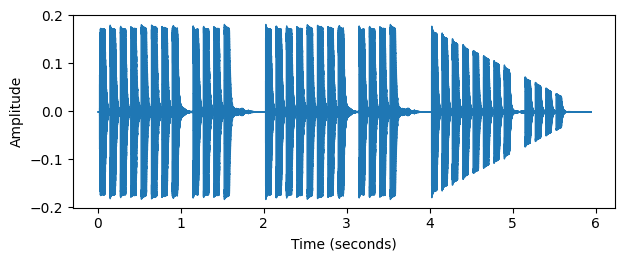

In [28]:
plt.figure(figsize=(7,2.5))
ax = plt.subplot()
librosa.display.waveshow(samples, sr=sample_rate, axis="s", ax=ax)
ax.set_ylabel("Time [s]")
ax.set_ylabel("Amplitude")
plt.show()

In [5]:
Audio(audio_path)

# Spectrogram



In [10]:
sgram = librosa.stft(samples)
sgram.shape


(1025, 512)

/tmp/ipykernel_490582/1523117549.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(sgram, ax=ax, x_axis="s", y_axis="hz")


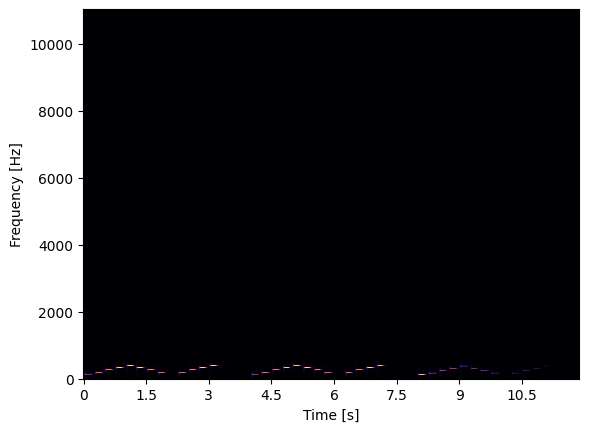

In [22]:
ax = plt.subplot()
librosa.display.specshow(sgram, x_axis="s", y_axis="hz", ax=ax)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Frequency [Hz]")
plt.show()

In [17]:
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
mel_scale_sgram.shape, mel_sgram.shape

((128, 512), (128, 512))

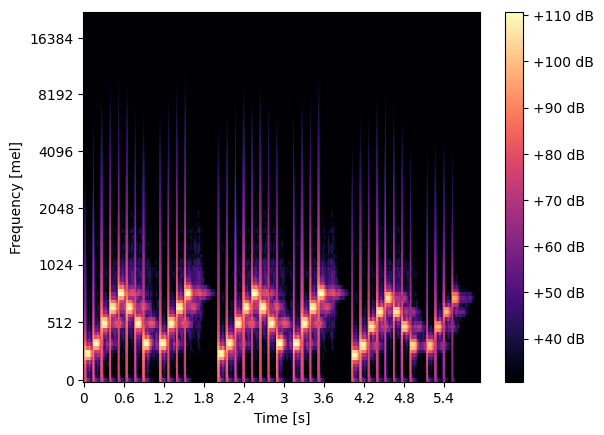

In [30]:
fig, ax = plt.subplots(figsize=(6.4,4.8))
img = librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis="time", y_axis="mel", ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Frequency [mel]")
plt.show()